# Hoeffdingの不等式の成否を検討

学習アルゴリズムの出力は基本的にデータに依存することから、Hoeffdingの不等式をそのまま「学習」には使うことができない。あくまで固定された候補に対する「検証」のときに使える。この事実の理解を促すとともに、数値実験によってどのような状況であればHoeffdingの不等式が成り立つか否かなどを調べることにする。

演習課題の内容は、`hoeffding_coins-JA.pdf`を参照すること。

___

## ひと通りの実行例

「表」の出る確率が1/2でも、どのコインをとっても、実際に投げてみると表の割合が0.5からずれることは当然ある。Hoeffdingが保証するのは、コインを＊個別に＊見たときに$\,\epsilon\,$だけのズレが生じる確率が相当小さいということである。しかし、先ほどのように、個々ではなく、すべてのコインに目を通した上で、「たまたまズレの大きかったコイン」を見ると、むしろズレが大きいほうが自然で、Hoeffdingの不等式が成り立つはずがない。実際、数値実験がこの事実を明確に示している。

In [1]:
# Coin generation experiment setup.

import numpy as np
import random
import matplotlib.pyplot as plt

_fontsize = "xx-large"

_num_trials = 10000
_num_coins = 1000
_num_flips = 10
_true_mean = 0.5

In [2]:
head_counts = np.random.binomial(n=_num_flips, p=_true_mean,
                                 size=(_num_trials,_num_coins))

In [3]:
head_fractions_1 = head_counts[:,0] / _num_flips
head_fractions_rand = np.zeros((_num_trials,), dtype=np.float32)
head_fractions_min = np.zeros((_num_trials,), dtype=np.float32)

for i in range(_num_trials):
    
    j_rand = random.randrange(_num_coins)
    j_min = np.argmin(head_counts[i,:])
    
    head_fractions_rand[i] = head_counts[i,j_rand] / _num_flips
    head_fractions_min[i] = head_counts[i,j_min] / _num_flips
    

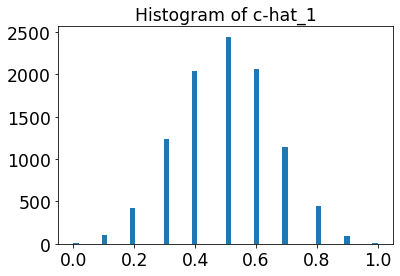

In [4]:
plt.hist(head_fractions_1, bins='auto')
plt.title("Histogram of c-hat_1", size=_fontsize)
plt.tick_params(labelsize=_fontsize)
plt.show()

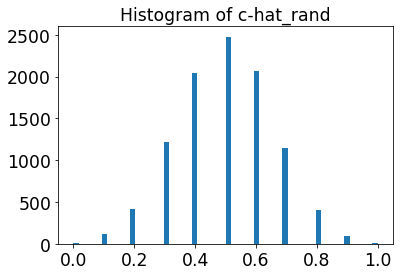

In [5]:
plt.hist(head_fractions_rand, bins='auto')
plt.title("Histogram of c-hat_rand", size=_fontsize)
plt.tick_params(labelsize=_fontsize)
plt.show()

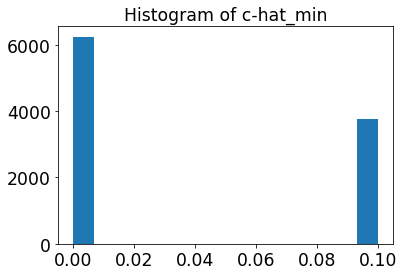

In [6]:
plt.hist(head_fractions_min, bins='auto')
plt.title("Histogram of c-hat_min", size=_fontsize)
plt.tick_params(labelsize=_fontsize)
plt.show()

In [7]:
epsilon_vals =  np.linspace(start=0.01, stop=1.00, num=50)

hoeffding_vals = np.exp(-2*(epsilon_vals**2)*_num_flips)

perf_1 = np.zeros((epsilon_vals.size,), dtype=np.float32)
perf_rand = np.zeros((epsilon_vals.size,), dtype=np.float32)
perf_min = np.zeros((epsilon_vals.size,), dtype=np.float32)

for i in range(epsilon_vals.size):
    
    epsilon = epsilon_vals[i]
    
    check_1 = np.absolute(head_fractions_1-_true_mean) > epsilon
    check_rand = np.absolute(head_fractions_rand-_true_mean) > epsilon
    check_min = np.absolute(head_fractions_min-_true_mean) > epsilon
    
    perf_1[i] = np.sum(check_1) / check_1.size
    perf_rand[i] = np.sum(check_rand) / check_rand.size
    perf_min[i] = np.sum(check_min) / check_min.size


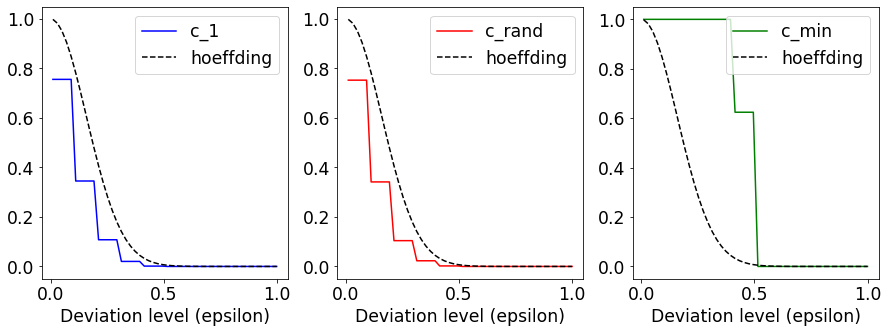

In [8]:
myfig = plt.figure(figsize=(15,5))

ax1 = myfig.add_subplot(1,3,1)
ax1.plot(epsilon_vals, perf_1, "-", color="blue", label="c_1")
ax1.plot(epsilon_vals, hoeffding_vals, "--", color="black", label="hoeffding")
ax1.legend(loc=1,ncol=1, fontsize=_fontsize)
plt.xlabel("Deviation level (epsilon)", size=_fontsize)
ax1.tick_params(labelsize=_fontsize)

ax2 = myfig.add_subplot(1,3,2)
ax2.plot(epsilon_vals, perf_rand, "-", color="red", label="c_rand")
ax2.plot(epsilon_vals, hoeffding_vals, "--", color="black", label="hoeffding")
ax2.legend(loc=1,ncol=1, fontsize=_fontsize)
plt.xlabel("Deviation level (epsilon)", size=_fontsize)
ax2.tick_params(labelsize=_fontsize)

ax3 = myfig.add_subplot(1,3,3)
ax3.plot(epsilon_vals, perf_min, "-", color="green", label="c_min")
ax3.plot(epsilon_vals, hoeffding_vals, "--", color="black", label="hoeffding")
ax3.legend(loc=1,ncol=1, fontsize=_fontsize)
plt.xlabel("Deviation level (epsilon)", size=_fontsize)
ax3.tick_params(labelsize=_fontsize)

plt.show()

___